In [1]:
import pandas as pd
import numpy as np

Jiang Using machine learning for stance detection
https://www.kaggle.com/code/sadoukhamzatarik/stance-based-model
enhanced sequential inference model

In [2]:
df = pd.read_csv('/Users/13632/Downloads/dataset_stance.csv')

In [3]:
df

,Unnamed: 0,Tweet,Target,Stance,Opinion Towards,Sentiment
0,0,"@tedcruz And, #HandOverTheServer she wiped cle...",Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
1,1,Hillary is our best choice if we truly want to...,Hillary Clinton,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
2,2,@TheView I think our country is ready for a fe...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
3,3,I just gave an unhealthy amount of my hard-ear...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,4,@PortiaABoulger Thank you for adding me to you...,Hillary Clinton,NONE,3. The tweet is not explicitly expressing opi...,pos
...,...,...,...,...,...,...
4865,1951,@realDonaldTrump we all want you as the next p...,Donald Trump,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
4866,1952,@RSherman_25 Join Twitter Trump brigade #oneth...,Donald Trump,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
4867,1953,@JoeyBats19 Join Twitter Trump brigade #onetho...,Donald Trump,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
4868,1954,Trump's outlandish statements is political str...,Donald Trump,AGAINST,1. The tweet explicitly expresses opinion abo...,neg


In [4]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)'))) - skipping


In [5]:
import sklearn

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
grouped_df = df.groupby(['Target'])
df_atheism = grouped_df.get_group('Atheism')
df_climate = grouped_df.get_group('Climate Change is a Real Concern')
df_trump = grouped_df.get_group('Donald Trump')
df_feminist = grouped_df.get_group('Feminist Movement')
df_clinton = grouped_df.get_group('Hillary Clinton')
df_abortion = grouped_df.get_group('Legalization of Abortion')

In [8]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)'))) - skipping


In [27]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\13632\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
nltk.download('omw-1.4') 

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\13632\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\13632\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [48]:
pip install "C:/Users/13632/AppData/Roaming/nltk_data/corpora/averaged_perceptron_tagger"

Note: you may need to restart the kernel to use updated packages.


ERROR: Directory 'C:/Users/13632/AppData/Roaming/nltk_data/corpora/averaged_perceptron_tagger' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


Defaulting to user installation because normal site-packages is not writeable
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)'))) - skipping


In [49]:
pip install "C:/Users/13632/AppData/Roaming/nltk_data/corpora/stopwords"

Defaulting to user installation because normal site-packages is not writeable
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


ERROR: Directory 'C:/Users/13632/AppData/Roaming/nltk_data/corpora/stopwords' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [29]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [39]:
# WORDNET LEMMATIZER (with appropriate pos tags)
lemmatizer = WordNetLemmatizer()
 
# Define function to lemmatize each word with its POS tag
 
# POS_TAGGER_FUNCTION : TYPE 1
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None
 
def lemmatizing(data):
    lemmatized_data = []
    for i in range(len(data)):
        sentence = data['Tweet'][i]

        # tokenize the sentence and find the POS tag for each token
        word_tokens = nltk.wordpunct_tokenize(sentence)
        pos_tagged = nltk.pos_tag(word_tokens) 

        
        # As you may have noticed, the above pos tags are a little confusing.
        
        # we use our own pos_tagger function to make things simpler to understand.
        wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
        
        lemmatized_sentence = []
        for word, tag in wordnet_tagged:
            word = word.lower()
            if word.isdigit():
                del word
            elif tag is None:
                # if there is no available tag, append the token as is
                lemmatized_sentence.append(word)
            else:       
                # else use the tag to lemmatize the token
                lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
        lemmatized_sentence = " ".join(lemmatized_sentence)
        lemmatized_data.append(lemmatized_sentence)
    return lemmatized_data

In [31]:
#CountVectorizer
def count_vectorizer(list):
    vectorizer = CountVectorizer(stop_words = 'english', lowercase=True, ngram_range=(1,3))
    matrix = vectorizer.fit_transform(list)
    count_table = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())    
    return count_table

refer to this website https://investigate.ai/text-analysis/counting-words-with-scikit-learns-countvectorizer/

In [55]:
pip install "C:/Users/13632/Downloads/wordcloud-1.8.2.2-pp39-pypy39_pp73-win_amd64.whl'

Defaulting to user installation because normal site-packages is not writeable
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: "C:/Users/13632/Downloads/wordcloud-1.8.2.2-pp39-pypy39_pp73-win_amd64.whl'"


In [15]:
from wordcloud import WordCloud

In [16]:
import matplotlib.pyplot as plt

In [23]:
df_atheism = df_atheism.drop('Unnamed: 0', axis='columns')
df_atheism = df_atheism.reset_index()
df_atheism = df_atheism.drop('index', axis = 'columns')

In [25]:
df_atheism

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,dear lord thank u for all of ur blessings forg...,Atheism,AGAINST,2. The tweet does NOT expresses opinion about ...,pos
1,"Blessed are the peacemakers, for they shall be...",Atheism,AGAINST,2. The tweet does NOT expresses opinion about ...,pos
2,I am not conformed to this world. I am transfo...,Atheism,AGAINST,2. The tweet does NOT expresses opinion about ...,pos
3,Salah should be prayed with #focus and #unders...,Atheism,AGAINST,2. The tweet does NOT expresses opinion about ...,pos
4,And stay in your houses and do not display you...,Atheism,AGAINST,2. The tweet does NOT expresses opinion about ...,neg
...,...,...,...,...,...
728,1of 2 #Never be #afraid to and never #apologis...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
729,How soon do you think WWIII &WWWIV will begin?...,Atheism,FAVOR,1. The tweet explicitly expresses opinion abo...,neg
730,"The humble trust in God: 'Whoever leans on, tr...",Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
731,Where will you be when @NewHorizons2015 flies ...,Atheism,FAVOR,1. The tweet explicitly expresses opinion abo...,pos


In [40]:
lemmatized_atheism = lemmatizing(df_atheism)

In [41]:
lemmatized_atheism

['dear lord thank u for all of ur blessing forgive my sin lord give me strength and energy for this busy day ahead # blessed # hope # semst',
 'bless be the peacemaker , for they shall be call child of god . matthew : # scripture # peace # semst',
 'i be not conform to this world . i be transform by the renewing of my mind . # ispeaklife # god # # semst',
 'salah should be pray with # focus and # understand . # allah warn against # lazy prayer do just for # show surah al - maoon : - # semst',
 'and stay in your house and do not display yourselves like that of the time of ignorance ." [ quran : ].# islam # semst',
 'if we be unsure whether something be halal or haram , we should leave it - this will # safeguard our # deen # rule # semst',
 'papa god , i pray that you shower me with more patience . # worththewait # semst',
 "now that the scoc have rule canadian have freedom from religion , can someone tell harper to dummy his ' god bless canada '. # cdnpoli # semst",
 'wow , unsubstantia

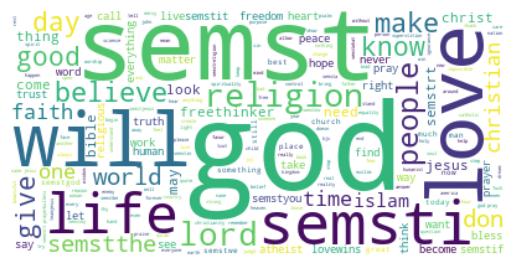

In [47]:
# create the WordCloud object
wordcloud = WordCloud(min_word_length =3,
                      background_color='white')

# generate the word cloud
corpus = ''
for string in lemmatizing(df_atheism):
    corpus += string
wordcloud.generate(corpus)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('atheism_wordcloud.png')

https://www.roseindia.net/answers/viewqa/pythonquestions/128746-ModuleNotFoundError-No-module-named-jupyterthemes.html

In [48]:
df_climate = df_climate.drop('Unnamed: 0', axis='columns')
df_climate = df_climate.reset_index()
df_climate = df_climate.drop('index', axis = 'columns')

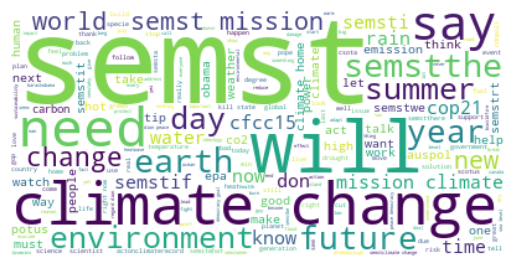

In [49]:
# generate the word cloud
corpus = ''
for string in lemmatizing(df_climate):
    corpus += string
wordcloud.generate(corpus)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('climate_wordcloud.png')

In [50]:
df_trump = df_trump.drop('Unnamed: 0', axis='columns')
df_trump = df_trump.reset_index()
df_trump = df_trump.drop('index', axis = 'columns')

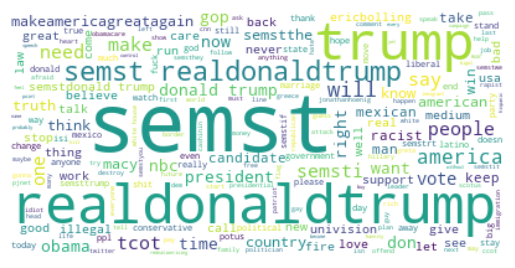

In [51]:
# generate the word cloud
corpus = ''
for string in lemmatizing(df_trump):
    corpus += string
wordcloud.generate(corpus)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('trump_wordcloud.png')

In [52]:
df_feminist = df_feminist.drop('Unnamed: 0', axis='columns')
df_feminist = df_feminist.reset_index()
df_feminist = df_feminist.drop('index', axis = 'columns')

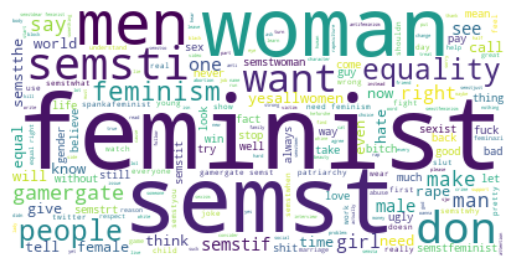

In [53]:
# generate the word cloud
corpus = ''
for string in lemmatizing(df_feminist):
    corpus += string
wordcloud.generate(corpus)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('feminist_wordcloud.png')

In [54]:
df_clinton = df_clinton.drop('Unnamed: 0', axis='columns')
df_clinton = df_clinton.reset_index()
df_clinton = df_clinton.drop('index', axis = 'columns')

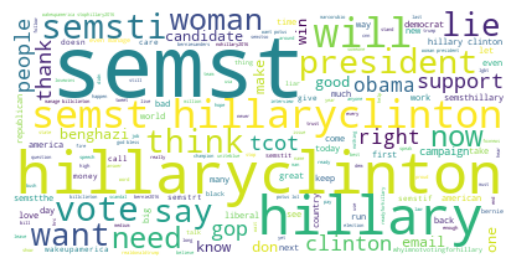

In [55]:
# generate the word cloud
corpus = ''
for string in lemmatizing(df_clinton):
    corpus += string
wordcloud.generate(corpus)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('clinton_wordcloud.png')

In [56]:
df_abortion = df_abortion.drop('Unnamed: 0', axis='columns')
df_abortion = df_abortion.reset_index()
df_abortion = df_abortion.drop('index', axis = 'columns')

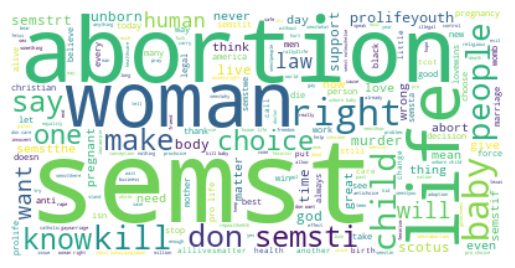

In [57]:
# generate the word cloud
corpus = ''
for string in lemmatizing(df_abortion):
    corpus += string
wordcloud.generate(corpus)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('abortion_wordcloud.png')